In [14]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from mpl_toolkits.basemap import Basemap

In [16]:
df = pd.read_excel('b30 stats.xlsx')
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,Exported,Area km2,worldview url,Notes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2012145.0,2012-05-24,0.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Mask Values,NaN
1,2012146.0,2012-05-25,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,#,Surrounding
2,2012147.0,2012-05-26,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,Near Land or no data
3,2012148.0,2012-05-27,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,Sea Ice
4,2012149.0,2012-05-28,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Open Ocean


In [17]:
len(df)

1854

In [19]:
df['year'] = df['datenormal'].dt.year
df_yearly = df.groupby(['year'])['lon', 'lat'].last()
df_yearly

,lon,lat
year,,
2012,-108.777,-73.209
2013,-118.178,-71.541
2014,-128.515,-73.604
2015,-131.757,-73.886
2016,-154.105,-73.494
2017,-155.500,-68.800
2018,-140.800,-63.000
2019,-135.200,-64.800


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


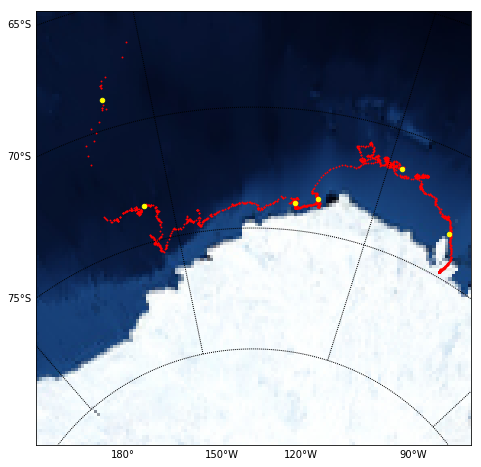

In [29]:
plt.figure(figsize=(8,8))
m = Basemap(projection='aeqd', resolution='l', lat_0=-75, lon_0=-138, width=2000000, height=2000000)
m.drawmeridians(np.arange(0,360,30), labels=[False, False, False, True])
m.drawparallels(np.arange(-90,90,5), labels=[True, False, False, False])

lons = df['lon'].values
lats = df['lat'].values
x, y = m(lons, lats)

# plot the daily positions
m.scatter(x, y, 3, marker='.', color='r')
m.scatter(x[-1], y[-1], 20, marker='o', color='white')

# plot the yearly positions
x, y = m(df_yearly['lon'].values, df_yearly['lat'].values)
m.scatter(x, y, 20, marker='o', color='yellow')

m.bluemarble(scale=0.5)